# Logistic Model ON Fashion-MINIST

In [1]:
import utils.mnist_reader as mnist_reader
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
seed = 0
np.random.seed(seed)
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
X, y = mnist_reader.load_mnist('data/fashion', kind='train')
X_te, y_te = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=True)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

(45000, 784) (15000, 784) (45000,) (15000,)


In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)
X_te = scaler.transform(X_te)

In [6]:
param_grid = {
    'penalty': ['elasticnet', 'l1', 'l2', None],
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000],
    'C': [0, 0.1, 1, 10, 50]
}
training_amount = 15000

In [8]:
logit = LogisticRegression(random_state=seed, n_jobs=-1)
grid_search = RandomizedSearchCV(logit, param_grid, cv=5, random_state=seed, n_jobs=-1)
grid_search.fit(X_tr[:training_amount], y_tr[:training_amount])

/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/User

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0, 0.1, 1, 10, 50],
                                        'max_iter': [100, 1000, 10000],
                                        'penalty': ['elasticnet', 'l1', 'l2',
                                                    None],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=0)

In [9]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

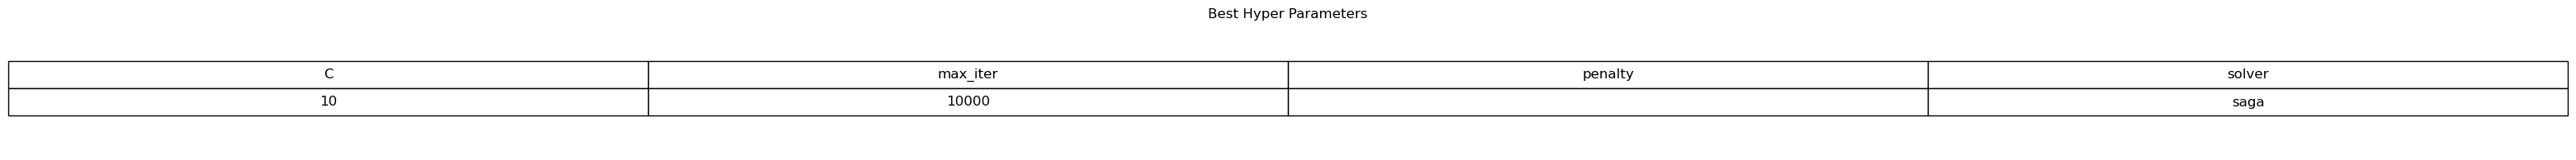

Best Accuracy Score: 0.8234


In [10]:
fig, ax = plt.subplots(figsize=(20, 2))
ax.axis('off')

table_data = [str(best_params), str(best_score)]

parameter_names = sorted(list(best_params.keys()))
parameter_values = [best_params[key] for key in parameter_names]

table = ax.table(cellText=[parameter_values], colLabels=parameter_names, cellLoc='center', loc='center')

# Set the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2)

plt.title('Best Hyper Parameters')
plt.show()

print(f'Best Accuracy Score: {best_score}')

In [11]:
df = pd.DataFrame(grid_search.cv_results_)
print(df)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.190537      0.016097         0.000000        0.000000   
1       0.130253      0.081894         0.000000        0.000000   
2       0.045224      0.006628         0.000000        0.000000   
3       0.039318      0.004731         0.000000        0.000000   
4    1645.562471     77.916739         0.073116        0.022221   
5     315.853776      9.081873         0.011776        0.002396   
6     260.282421     23.204940         0.037086        0.033780   
7       0.024868      0.008930         0.000000        0.000000   
8       0.027080      0.010188         0.000000        0.000000   
9       0.051489      0.049253         0.000000        0.000000   

      param_solver param_penalty param_max_iter param_C  \
0              sag            l1           1000      10   
1              sag            l1            100      10   
2  newton-cholesky            l2            100       0   
3        newton-cg    elas

In [12]:
counts = [1000, 5000, 10000, 20000, 30000, 45000]

tr_errs = []
te_errs = []

for n in counts:
    new_model = LogisticRegression(random_state=seed, solver='saga', max_iter=10000, C=10, n_jobs=-1)
    new_model.fit(X_tr[:n], y_tr[:n])

    # compute training error and testing error
    y_tr_pred = new_model.predict(X_tr)
    tr_errs.append(1 - accuracy_score(y_tr, y_tr_pred))

    y_te_pred = new_model.predict(X_te)
    te_errs.append(1 - accuracy_score(y_te, y_te_pred))

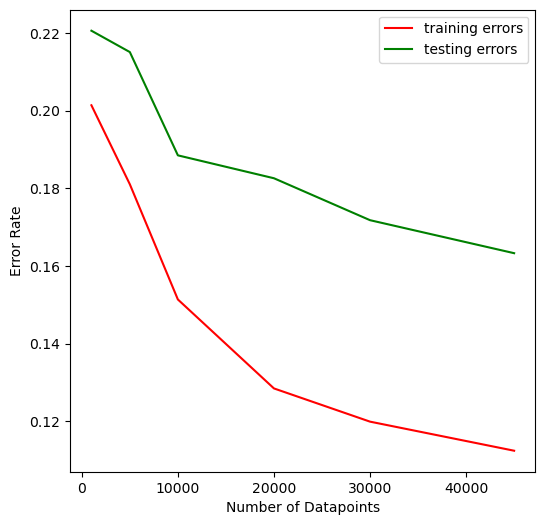

In [13]:
figure, axes = plt.subplots(1, figsize=(6, 6))

axes.set_xlabel('Number of Datapoints')
axes.set_ylabel('Error Rate')

axes.plot(counts, tr_errs, color='red', label='training errors')
axes.plot(counts, te_errs, color='green', label='testing errors')
axes.legend()

In [14]:
# model = LogisticRegression(random_state=seed, solver='saga', max_iter=10000)
# model.fit(X_tr, y_tr)

y_tr_pred = new_model.predict(X_tr)
y_te_pred = new_model.predict(X_te)

Training Accuracy of Logistic Model: 0.8875777777777778
Validation Accuracy of Logistic Model: 0.8367


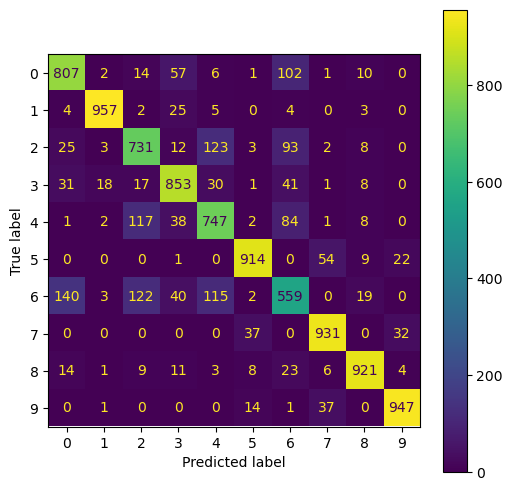

In [15]:
# plot confusion matrix
figure, axes = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_te, y_te_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(ax=axes)

acc_tr = accuracy_score(y_tr, y_tr_pred)
acc_te = accuracy_score(y_te, y_te_pred)

print(f"Training Accuracy of Logistic Model: {acc_tr}")
print(f"Validation Accuracy of Logistic Model: {acc_te}")

<Axes: >

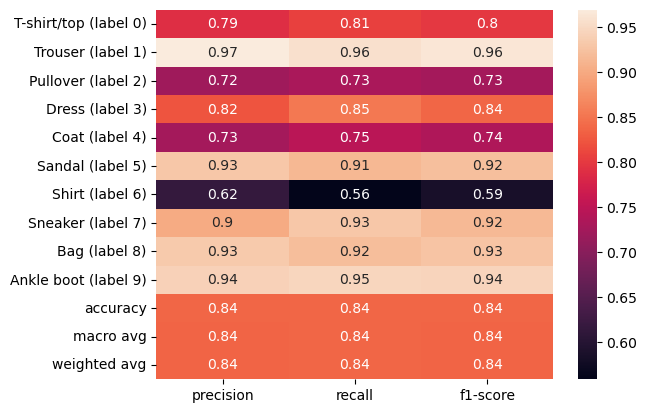

In [16]:
label2desc = {0: 'T-shirt/top (label 0)', 
              1: 'Trouser (label 1)', 
              2: 'Pullover (label 2)', 
              3: 'Dress (label 3)', 
              4: 'Coat (label 4)', 
              5: 'Sandal (label 5)', 
              6: 'Shirt (label 6)', 
              7: 'Sneaker (label 7)',
              8: 'Bag (label 8)',
              9: 'Ankle boot (label 9)'}



report = classification_report(y_te, y_te_pred, target_names = label2desc.values(), output_dict=True)

sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)